In [1]:
import os

import librosa
import numpy as np
from scipy.io import wavfile
from tqdm.notebook import tqdm

from text import _clean_text

import yaml
import joblib
from joblib import Parallel, delayed
from dask.distributed import Client

client = Client()

In [2]:
from glob import glob
import json
import matplotlib.pyplot as plt

In [3]:
pitch_path = "/scratch/space1/tc046/lordzuko/work/data/preprocessed_data/BC2013/pitch/*.npy"
duration_path = "/scratch/space1/tc046/lordzuko/work/data/preprocessed_data/BC2013/duration/*.npy"
energy_path = "/scratch/space1/tc046/lordzuko/work/data/preprocessed_data/BC2013/energy/*.npy"
stats_path = "/scratch/space1/tc046/lordzuko/work/data/preprocessed_data/BC2013/stats.json"

In [4]:
source = "/scratch/space1/tc046/lordzuko/work/data/preprocessed_data/BC2013/val.txt"

In [5]:
vlist = []
with open(source) as f:
    for x in f.readlines():
        vlist.append(x.split("|")[0])

In [6]:
with open(stats_path) as f:
    stats = json.load(f)

In [7]:
stats

{'pitch': [-4.130854596155979,
  11.531974804192563,
  196.76025206151675,
  47.631851347325224],
 'energy': [-1.356759786605835,
  6.692559719085693,
  51.43988901345133,
  37.91377736601564]}

In [8]:
print(len(vlist))

512


In [9]:
pitch_list = []
for x in tqdm(glob(pitch_path), total=len(glob(pitch_path)), desc="tota:> "):
    
    y = "-".join(x.split("/")[-1].split(".")[0].split("-")[2:])
    if y in vlist:
        pitch = np.load(x)
        pitch = pitch * stats["pitch"][3] + stats["pitch"][2]
        pitch_list.extend(pitch)
#     print(pitch)
    
#     
#     print(pitch)
#     break

tota:> :   0%|          | 0/39960 [00:00<?, ?it/s]

In [10]:
len(pitch_list)

20262

(array([6.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        5.300e+01, 1.260e+02, 1.150e+02, 1.400e+02, 2.650e+02, 4.220e+02,
        8.320e+02, 1.519e+03, 2.162e+03, 2.230e+03, 2.092e+03, 1.852e+03,
        1.664e+03, 1.404e+03, 1.168e+03, 9.440e+02, 7.100e+02, 6.330e+02,
        4.990e+02, 3.470e+02, 2.730e+02, 2.210e+02, 1.480e+02, 8.900e+01,
        7.500e+01, 6.400e+01, 5.000e+01, 3.000e+01, 3.100e+01, 2.200e+01,
        2.300e+01, 1.400e+01, 1.700e+01, 7.000e+00, 4.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 5.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  0.        ,  11.02884588,  22.05769175,  33.08653763,
         44.1153835 ,  55.14422938,  66.17307526,  77.20192113,
         88.23076701,  99.25961288, 110.28845876, 121.31730464,
        132.34615051, 143.37499639, 154.40384226, 165.43268814,
        176.46153402, 187.49037989, 198.51922577, 209.54807164,
        220.57691752, 231.6057634 , 242.63460927, 253.66

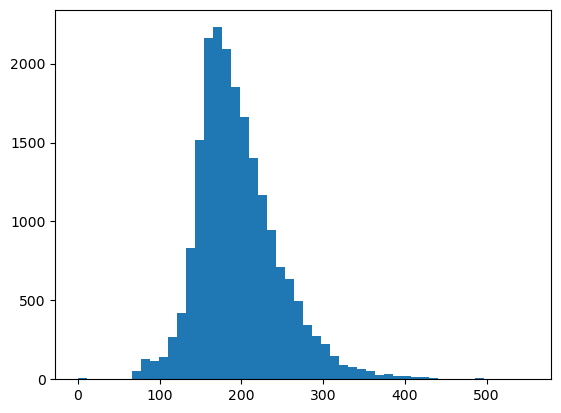

In [11]:
plt.hist(pitch_list, bins=50)

In [12]:
energy_list = []
for x in tqdm(glob(energy_path), total=len(glob(energy_path)), desc="tota:> "):
    y = "-".join(x.split("/")[-1].split(".")[0].split("-")[2:])
    if y in vlist:
        energy = np.load(x)
    #     print(pitch)
        energy = energy * stats["energy"][3] + stats["energy"][2]

        energy_list.extend(energy)
    #     print(pitch)
    #     break

tota:> :   0%|          | 0/39960 [00:00<?, ?it/s]

(array([2.003e+03, 9.950e+02, 9.240e+02, 9.830e+02, 1.020e+03, 9.880e+02,
        1.049e+03, 1.074e+03, 1.069e+03, 1.030e+03, 9.540e+02, 9.100e+02,
        9.010e+02, 7.950e+02, 7.290e+02, 6.180e+02, 5.360e+02, 4.940e+02,
        4.020e+02, 3.800e+02, 3.620e+02, 2.830e+02, 2.750e+02, 2.320e+02,
        2.000e+02, 1.600e+02, 1.630e+02, 1.490e+02, 1.230e+02, 1.070e+02,
        7.100e+01, 5.900e+01, 4.500e+01, 4.200e+01, 3.600e+01, 2.300e+01,
        1.900e+01, 1.400e+01, 9.000e+00, 1.100e+01, 3.000e+00, 3.000e+00,
        6.000e+00, 4.000e+00, 3.000e+00, 1.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([  0.        ,   5.22881603,  10.45763206,  15.6864481 ,
         20.91526413,  26.14407921,  31.37289619,  36.60171127,
         41.83052826,  47.05934143,  52.28815842,  57.5169754 ,
         62.74579239,  67.97460938,  73.20342255,  78.43223572,
         83.66105652,  88.88986969,  94.11868286,  99.34750366,
        104.57631683, 109.80513763, 115.03395081, 120.26

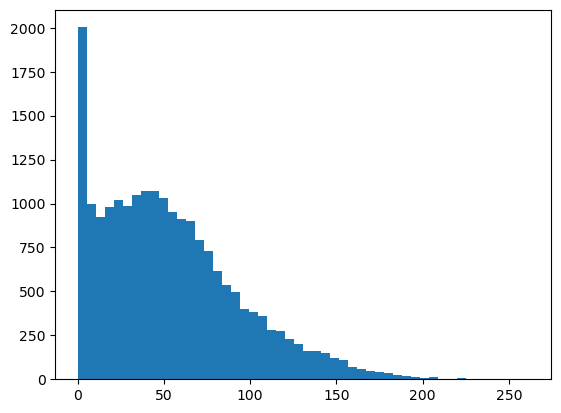

In [13]:
plt.hist(energy_list, bins=50)

In [14]:
duration_list = []
for x in tqdm(glob(duration_path), total=len(glob(duration_path)), desc="tota:> "):
    y = "-".join(x.split("/")[-1].split(".")[0].split("-")[2:])
    if y in vlist:
        duration = np.load(x)
    #     print(pitch)

        duration_list.extend(duration)
    #     print(pitch)
    #     break

tota:> :   0%|          | 0/39960 [00:00<?, ?it/s]

In [15]:
def remove_outlier(values):
    values = np.array(values)
    p25 = np.percentile(values, 25)
    p75 = np.percentile(values, 75)
    lower = p25 - 3 * (p75 - p25)
    upper = p75 + 3 * (p75 - p25)
    normal_indices = np.logical_and(values > lower, values < upper)
    
    return values[normal_indices]

In [16]:
clean_duration_list = remove_outlier(duration_list)

(array([   6.,    0.,    0.,   43.,    0.,    0.,  406.,    0.,    0.,
        1671.,    0.,    0., 2830.,    0.,    0., 3097.,    0.,    0.,
        3109.,    0.,    0., 2361.,    0.,    0.,    0., 1754.,    0.,
           0., 1354.,    0.,    0.,  930.,    0.,    0.,  715.,    0.,
           0.,  535.,    0.,    0.,  383.,    0.,    0.,  249.,    0.,
           0.,  179.,    0.,    0.,  142.]),
 array([ 0.  ,  0.32,  0.64,  0.96,  1.28,  1.6 ,  1.92,  2.24,  2.56,
         2.88,  3.2 ,  3.52,  3.84,  4.16,  4.48,  4.8 ,  5.12,  5.44,
         5.76,  6.08,  6.4 ,  6.72,  7.04,  7.36,  7.68,  8.  ,  8.32,
         8.64,  8.96,  9.28,  9.6 ,  9.92, 10.24, 10.56, 10.88, 11.2 ,
        11.52, 11.84, 12.16, 12.48, 12.8 , 13.12, 13.44, 13.76, 14.08,
        14.4 , 14.72, 15.04, 15.36, 15.68, 16.  ]),
 <BarContainer object of 50 artists>)

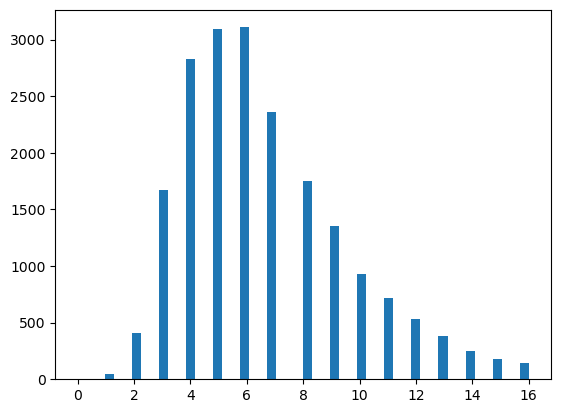

In [17]:
plt.hist(clean_duration_list, bins=50)

In [21]:
import re
from tqdm.notebook import tqdm
import argparse
from string import punctuation

import torch
import yaml
import numpy as np
from torch.utils.data import DataLoader
from g2p_en import G2p
from pypinyin import pinyin, Style

from utils.model import get_model, get_vocoder
from utils.tools import to_device, synth_samples
from dataset import TextDataset
from text import text_to_sequence

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



In [22]:

def read_lexicon(lex_path):
    lexicon = {}
    with open(lex_path) as f:
        for line in f:
            temp = re.split(r"\s+", line.strip("\n"))
            word = temp[0]
            phones = temp[1:]
            if word.lower() not in lexicon:
                lexicon[word.lower()] = phones
    return lexicon


def preprocess_english(text, preprocess_config):
    text = text.rstrip(punctuation)
    lexicon = read_lexicon(preprocess_config["path"]["lexicon_path"])

    g2p = G2p()
    phones = []
    words = re.split(r"([,;.\-\?\!\s+])", text)
    for w in words:
        if w.lower() in lexicon:
            phones += lexicon[w.lower()]
        else:
            phones += list(filter(lambda p: p != " ", g2p(w)))
    phones = "{" + "}{".join(phones) + "}"
    phones = re.sub(r"\{[^\w\s]?\}", "{sp}", phones)
    phones = phones.replace("}{", " ")

    print("Raw Text Sequence: {}".format(text))
    print("Phoneme Sequence: {}".format(phones))
    sequence = np.array(
        text_to_sequence(
            phones, preprocess_config["preprocessing"]["text"]["text_cleaners"]
        )
    )

    return np.array(sequence)


def preprocess_mandarin(text, preprocess_config):
    lexicon = read_lexicon(preprocess_config["path"]["lexicon_path"])

    phones = []
    pinyins = [
        p[0]
        for p in pinyin(
            text, style=Style.TONE3, strict=False, neutral_tone_with_five=True
        )
    ]
    for p in pinyins:
        if p in lexicon:
            phones += lexicon[p]
        else:
            phones.append("sp")

    phones = "{" + " ".join(phones) + "}"
    print("Raw Text Sequence: {}".format(text))
    print("Phoneme Sequence: {}".format(phones))
    sequence = np.array(
        text_to_sequence(
            phones, preprocess_config["preprocessing"]["text"]["text_cleaners"]
        )
    )

    return np.array(sequence)



In [23]:

def synthesize(model, step, configs, vocoder, batchs, control_values):
    preprocess_config, model_config, train_config = configs
    pitch_control, energy_control, duration_control = control_values

    for batch in tqdm(batchs, total=len(batchs), desc="batches:> "):
        batch = to_device(batch, device)
        with torch.no_grad():
            # Forward
            output = model(
                *(batch[2:]),
                p_control=pitch_control,
                e_control=energy_control,
                d_control=duration_control
            )
            
            pitch = output[1]
            energy = output[2]
            duration = output[4]
            
        
#             synth_samples(
#                 batch,
#                 output,
#                 vocoder,
#                 model_config,
#                 preprocess_config,
#                 train_config["path"]["result_path"],
#             )

In [24]:
class Args:
    mode = "batch"
    source = "/scratch/space1/tc046/lordzuko/work/data/preprocessed_data/BC2013/val.txt"
    restore_step = 10000
    preprocess_config = "config/BC2013/preprocess.yaml"
    model_config = "config/BC2013/model.yaml"
    train_config = "config/BC2013/train.yaml"
    pitch_control = 1.0
    energy_control = 1.0
    duration_control = 1.0

In [25]:
args = Args()

In [26]:
# Read Config
preprocess_config = yaml.load(
    open(args.preprocess_config, "r"), Loader=yaml.FullLoader
)
model_config = yaml.load(open(args.model_config, "r"), Loader=yaml.FullLoader)
train_config = yaml.load(open(args.train_config, "r"), Loader=yaml.FullLoader)
configs = (preprocess_config, model_config, train_config)

In [27]:
# Get model
print("Loading Model...")
model = get_model(args, configs, device, train=False)
print("Model Loaded")
# Load vocoder
print("Loading Vocoder...")
vocoder = get_vocoder(model_config, device)
print("Vocoder Loaded")


Loading Model...
Model Loaded
Loading Vocoder...
Removing weight norm...
Vocoder Loaded


In [28]:
# Get dataset
dataset = TextDataset(args.source, preprocess_config)
batchs = DataLoader(
    dataset,
    batch_size=8,
    collate_fn=dataset.collate_fn,
)

In [29]:
control_values = args.pitch_control, args.energy_control, args.duration_control   

In [30]:
pitch_control, energy_control, duration_control = control_values

In [31]:
pred_pitch_list = []
pred_energy_list = []
pred_duration_list = []

for batch in tqdm(batchs, total=len(batchs), desc="batches:> "):
    batch = to_device(batch, device)
    with torch.no_grad():
        # Forward
        output = model(
            *(batch[2:]),
            p_control=pitch_control,
            e_control=energy_control,
            d_control=duration_control
        )

        pitch = output[2]
        energy = output[3]
        duration = output[5]
        src_mask = output[6]
        
        
        for p,e,d, m in zip(pitch, energy, duration, src_mask):
            pred_pitch_list.extend(list(p[~m].cpu().numpy()))
            pred_energy_list.extend(list(e[~m].cpu().numpy()))
            pred_duration_list.extend(list(d[~m].cpu().numpy()))


batches:> :   0%|          | 0/64 [00:00<?, ?it/s]

In [32]:
pred_np_pitch = np.array(pred_pitch_list) * stats["pitch"][3] + stats["pitch"][2]
pred_np_energy = np.array(pred_energy_list) * stats["energy"][3] + stats["energy"][2]

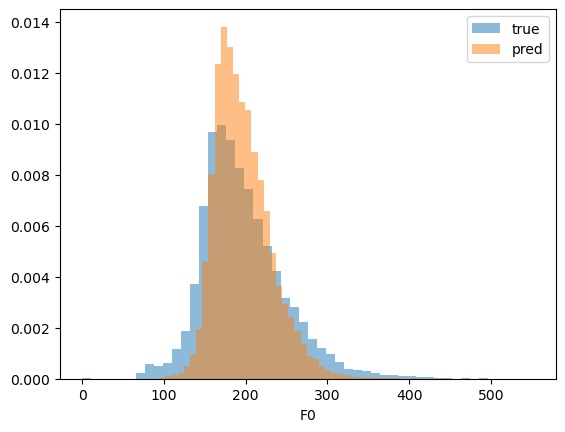

In [33]:
%matplotlib inline

plt.hist(pitch_list, bins=50, alpha=0.5, label='true', density=True)
plt.hist(list(pred_np_pitch), bins=50, alpha=0.5, label='pred', density=True)
plt.legend(loc='upper right')
plt.xlabel("F0")
plt.show()

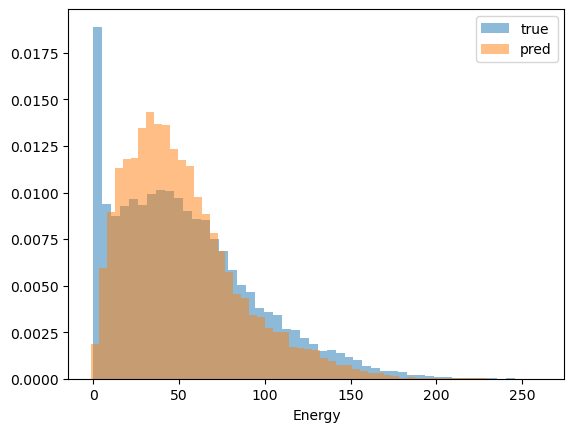

In [34]:
%matplotlib inline

plt.hist(energy_list, bins=50, alpha=0.5, label='true', density=True)
plt.hist(list(pred_np_energy), bins=50, alpha=0.5, label='pred', density=True)
plt.legend(loc='upper right')
plt.xlabel("Energy")
plt.show()

In [35]:
clean_pred_duration_list = remove_outlier(pred_duration_list)

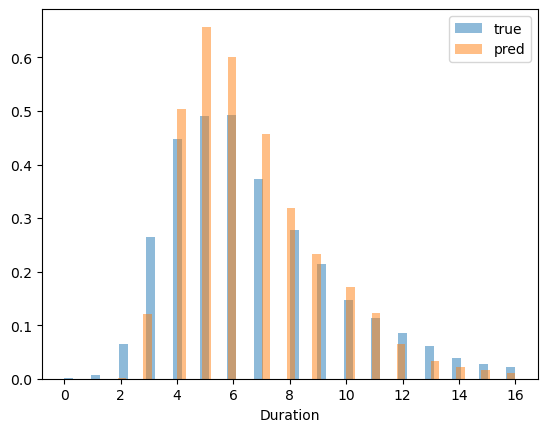

In [36]:
%matplotlib inline

plt.hist(clean_duration_list, bins=50, alpha=0.5, label='true', density=True)
plt.hist(list(clean_pred_duration_list), bins=50, alpha=0.5, label='pred', density=True)
plt.legend(loc='upper right')
plt.xlabel("Duration")
plt.show()

In [37]:
def remove_outlier(values):
    values = np.array(values)
    p25 = np.percentile(values, 25)
    p75 = np.percentile(values, 75)
    lower = p25 - 6 * (p75 - p25)
    upper = p75 + 6 * (p75 - p25)
    normal_indices = np.logical_and(values > lower, values < upper)
    
    return values[normal_indices]

In [38]:
clean_duration_list = remove_outlier(duration_list)
clean_pred_duration_list = remove_outlier(pred_duration_list)

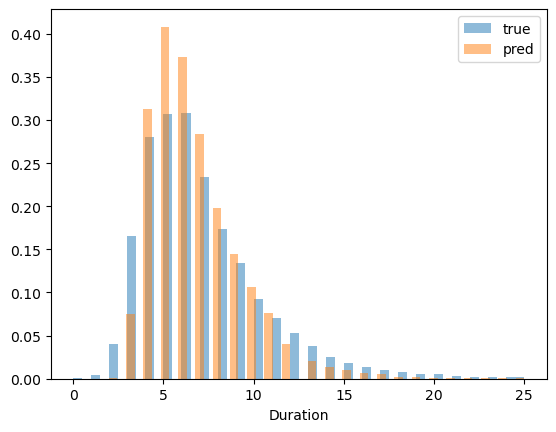

In [39]:
%matplotlib inline

plt.hist(clean_duration_list, bins=50, alpha=0.5, label='true', density=True)
plt.hist(list(clean_pred_duration_list), bins=50, alpha=0.5, label='pred', density=True)
plt.legend(loc='upper right')
plt.xlabel("Duration")
plt.show()